In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import shutil
import warnings
print(os.listdir("/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset"))

['Prediction', 'Val', 'Train']


In [3]:
TRAIN_PATH = "/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Train"
VAL_PATH = "/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])
warnings.filterwarnings('ignore')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

# **Train from Scratch**

## Data Augmentation

In [7]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


# Fit the Model

In [11]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 103s 12s/step - loss: 0.7036 - accuracy: 0.5508 - val_loss: 0.6761 - val_accuracy: 0.9000
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5652 - accuracy: 0.7109 - val_loss: 0.5527 - val_accuracy: 0.6833
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.3597 - accuracy: 0.8320 - val_loss: 0.3435 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.2681 - accuracy: 0.8867 - val_loss: 0.3330 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.2622 - accuracy: 0.8984 - val_loss: 0.1425 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.1619 - accuracy: 0.9570 - val_loss: 0.0780 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2896 - accuracy: 0.9375 - val_loss: 0.1892 - val_accuracy: 0.9833
Epoch 8/10
8/8 [================

# Loss is very less and accuracy is on point

In [12]:
model.save("Detection_Covid_19.h5")

In [13]:
# model.evaluate_generator(train_generator)

In [14]:
# model.evaluate_generator(validation_generator)

# Test Images

In [15]:
model = load_model("Detection_Covid_19.h5")

In [16]:
import os

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# Confusion Matrix

In [19]:
y_actual = []
y_test = []

for i in os.listdir("/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val/Normal"):
    img = image.load_img("/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #p = model.predict_classes(img)
    p= (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(1)

1/1 [==============================] - 0s 18ms/step


In [20]:
for i in os.listdir("/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val/Covid"):
    img = image.load_img("/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #p = model.predict_classes(img)
    p= (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(0)

1/1 [==============================] - 0s 51ms/step


In [21]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
print(cm)

[[30  0]
 [ 1 29]]


In [24]:
import seaborn as sns
# sns.heatmap(cm,cmap = "plasma" , annot=True)

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 #color="white" if cm[i, j] > thresh else "black")
                 color="white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion Matrix

Confusion matrix, without normalization
[[30  0]
 [ 1 29]]


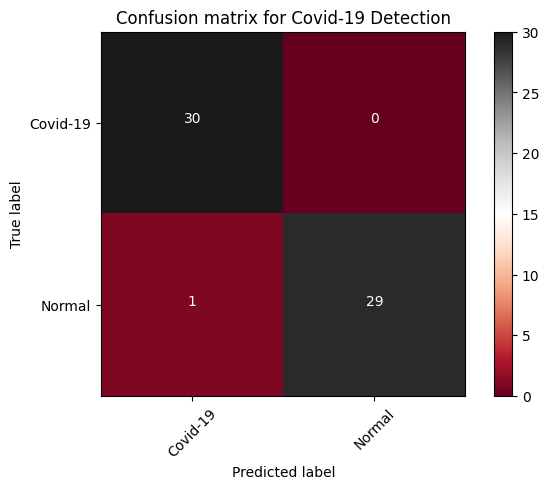

In [26]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="RdGy")

# List all data in history

In [27]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Summarize history for accuracy

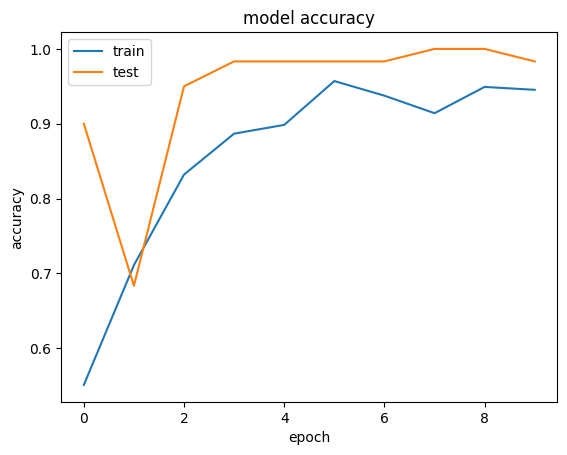

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss

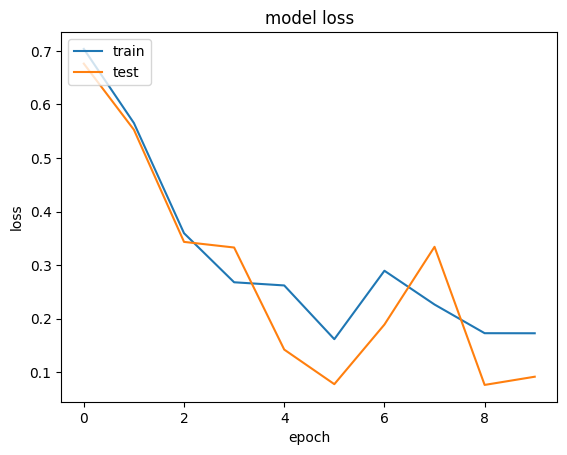

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predictions from X-Ray Images

In [30]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image

def predict_image(path):
    xtest_image = image.load_img(path, target_size = (224, 224))
    xtest_image = image.img_to_array(xtest_image)
    xtest_image = np.expand_dims(xtest_image, axis = 0)
    #results = model.predict_classes(xtest_image)
    results=(model.predict(xtest_image) > 0.5).astype("int32")
    # training_set.class_indices
    imggg = cv2.imread(path)
    #print("This Xray Image is of positive covid-19 patient")
    imggg = np.array(imggg)
    imggg = cv2.resize(imggg,(400,400))
    plt.imshow(imggg)
    # cv2_imshow(imggg)
    # print(results)
    if results[0][0] == 0:
        prediction = 'Positive For Covid-19'
    else:
        prediction = 'Negative for Covid-19'

    return prediction

1/1 [==============================] - 0s 34ms/step

Predicted Label:  Negative for Covid-19


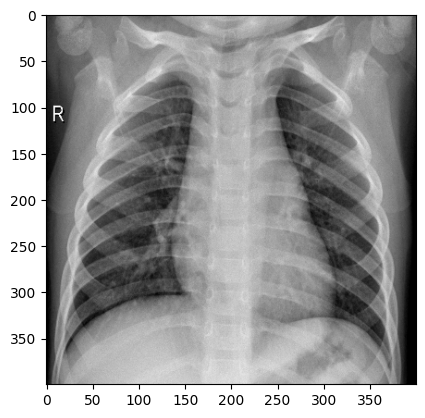

In [31]:
img_path="/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg"
predicted=predict_image(img_path)
print("\nPredicted Label: ",predicted)

1/1 [==============================] - 0s 17ms/step

Predicted Label:  Positive For Covid-19


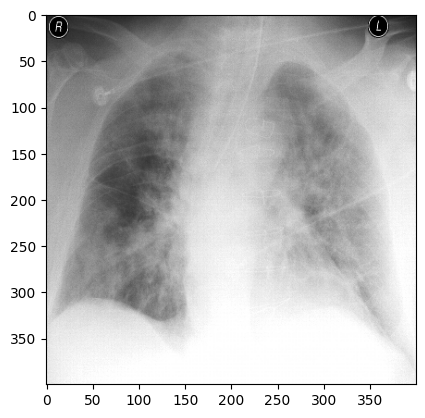

In [32]:
img_path="/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg"
predicted=predict_image(img_path)
print("\nPredicted Label: ",predicted)

1/1 [==============================] - 0s 68ms/step

Predicted Label:  Negative for Covid-19


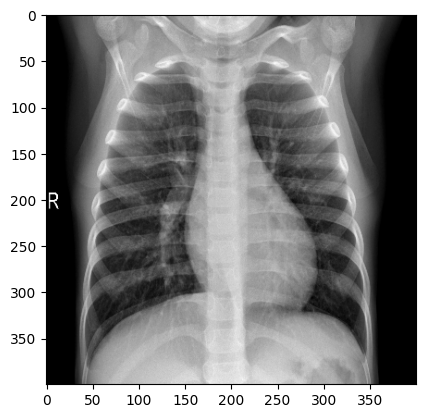

In [33]:
img_path="/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg"
predicted=predict_image(img_path)
print("\nPredicted Label: ",predicted)

1/1 [==============================] - 0s 24ms/step

Predicted Label:  Positive For Covid-19


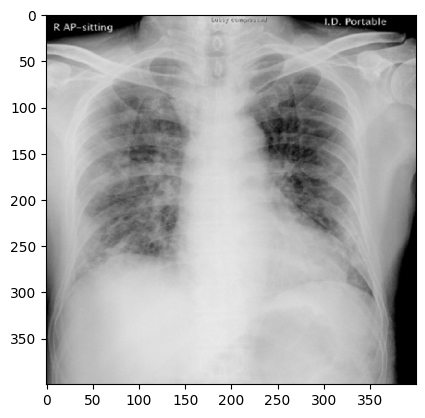

In [34]:
img_path="/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg"
predicted=predict_image(img_path)
print("\nPredicted Label: ",predicted)

1/1 [==============================] - 0s 18ms/step

Predicted Label:  Positive For Covid-19


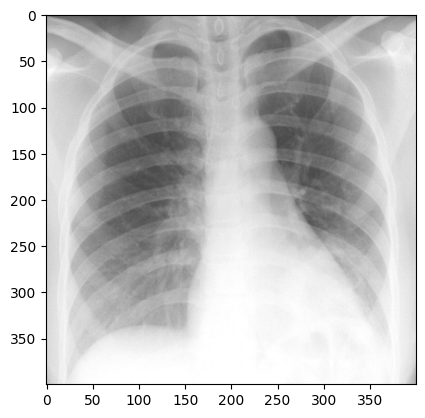

In [35]:
img_path="/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg"
predicted=predict_image(img_path)
print("\nPredicted Label: ",predicted)